<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/Example_Clouding_Atlassian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clouding Atlassian Architecture Example

* [Current State Diagram](https://colab.research.google.com/drive/15XPAFlQwWtpUbDZC_yBMFfKjrfuFEIf8#scrollTo=wVFxWnQnazpr&line=1&uniqifier=1)
* [Future State Diagram](https://colab.research.google.com/drive/15XPAFlQwWtpUbDZC_yBMFfKjrfuFEIf8#scrollTo=8cRYTJwteobu&line=1&uniqifier=1)

## Why 

Keeping architecture diagrams up to date is difficult. Creating them is just as difficult. Architects spend most of their time gathering the right icons, drawing lines in Miro or Viso making sure that they are the right type etc. etc. etc. What a waste of time. 

Instead architects should be focused on ensuring that the current state is correct and that proposed changes to the enterprise ecosystem have taken into account all other systems that may be impacted. 

Architecture diagrams as code (ADAC) is a way of allowing architects to focus on the right things and stop wasting time. It can also help other areas of the business by creating or leveraging a configuration management database (CMDB). 

ADAC can also be extended to include the personas that interact with the systems. This is an important part of the impact analysis and can be the starting point for other agile techniques such as epic and story writing. 

## Guide 

Colab is a free tool for google users which makes it a perfect candidate for any company but especially a company that uses google drive. It is possible to connect this repository to Google Drive and/or Github for further document control and archiving. 

*C4 Model* is a great starting point for any architecture diagram repository as they can easily map to the the levels of testing, for example context is system testing, code is unit testing. With the right diagrams and subsequently the right level of thinking architecture, development and testing can all use the same diagrams to create meaningful and valuable assets for the company. See https://c4model.com/ for more details. 

*Diagrams* is a phyton library that allows for diagrams to be created from code. See https://diagrams.mingrammer.com/docs/nodes/c4 for more details. 

## How to run 

Run notebook cells in order. Please install "diagrams" first, and then default settings to correctly set up the environment.

The simplest way to do this is Ctrl-F9 to "Run all".

## Things to do 

This is just an example, as such there are a few things that can be created to ensure that this is enterprise ready. 

Obviously, not all the icons are coming through and instead being replaced by the *dead folder* icon, icons need to be able to be downloaded by colab - a google drive location would be best. 

The repository can be extracted into a stand alone Python file (.py). This file can be generated from the CMDB or json or whatever. 

```python 
from urllib import request
request.urlretrieve('https://git/main/Repository.py', 'Repository.py')
```
then loading the model and classes 
```python 
from Repository import OurSystems, OurPersonas, OurDataStores, OurExternalSystems
```

Obviously, this also means that we could create separate files for systems, external systems, personas, etc. and load them into the context. These can continue to be extended by delivery teams with new personas or systems. 

Repositories could also be versioned and released as required with leadership oversight and approvals.

There could also be current state and future state repositories which update as new systems are added and retired.

The created images can be exported to google drive or downloaded manually and included in confluence documentation. There is also Jupyter plugins for confluence that allow for visualisation (e.g. https://marketplace.atlassian.com/apps/1220365/jupyter-notebook-viewer-for-confluence?tab=overview&hosting=cloud) 

Finally, the cell called *"Reflected Repository"* prints out the details of the components available in the repository. The script includes the following line:
```python 
  if cls[0].startswith('Our'):
```
which shows only those classes that start with Our, e.g. OurSystems, OurPersonas. 

In [34]:
#@title Install Diagrams
import os
os.system('pip install diagrams')

0

In [1]:
#@title Default Settings
from diagrams.c4 import Person, Container, Database, System
from diagrams.custom import Custom
from urllib import request
from IPython.display import display, Markdown
import sys, inspect

display(Markdown('# Imports'))

display(Markdown('+ https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/Example_Clouding_Atlassian_Repository.py'))
request.urlretrieve('https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/Example_Clouding_Atlassian_Repository.py', '_Example_Clouding_Atlassian_Repository_.py')

from _Example_Clouding_Atlassian_Repository_ import * 

for cls in inspect.getmembers(sys.modules[__name__], inspect.isclass):
  try:
    eval(cls[0] + '()').Print()
  except:
    pass

#@markdown ----------------------------------------------
#@markdown ## Attributes

#@markdown + Graph Attributes
global_graph_attr = {
  "splines": "spline",
  "fontsize": "10",
  "bgcolor": "transparent"
}

#@markdown + Node Attributes
global_node_attr = {
  "fontsize": "8px",
  "width": "1.8"#,
  #"height": "1.4"

}

# Imports

+ https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/Example_Clouding_Atlassian_Repository.py

---

## ActiveDirectory

| Key         | Value       |
                   | ----------- | ----------- |
| label | Active Directory |
| icon_path | ActiveDirectory.png |
| name | Name missing |
| description |  |

---

## Bamboo

| Key         | Value       |
                   | ----------- | ----------- |
| name | Bamboo (Server) |
| technology | Linux |
| description | Bamboo. |
| label | <<font point-size="12"><b>Bamboo (Server)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> bamboo.internal.server.com.au <br/> 192.168.61.150</font>> |
| CPU |  |
| RAM |  |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone |  |
| Confluence Application Version | 8.13.2 |

---

## BitBucket

| Key         | Value       |
                   | ----------- | ----------- |
| label | BitBucket |
| icon_path | BitBucket.png |
| name | Name missing |
| description |  |

---

## Citrix

| Key         | Value       |
                   | ----------- | ----------- |
| label | Citrix |
| icon_path | Citrix.png |
| name | Name missing |
| description |  |

---

## Confluence

| Key         | Value       |
                   | ----------- | ----------- |
| name | Confluence (Server) |
| technology | Linux |
| description | Confluence |
| label | <<font point-size="12"><b>Confluence (Server)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> confluence.internal.server.com.au <br/> 192.168.110.100</font>> |
| CPU |  |
| RAM |  |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone |  |
| Confluence Application Version | 8.13.2 |

---

## ConfluenceCloud

| Key         | Value       |
                   | ----------- | ----------- |
| name | Confluence (Atlassian) |
| technology | Cloud |
| description | Confluence |
| label | <<font point-size="12"><b>Confluence (Server)</b></font><br/><font point-size="9">[SAAS]<br/></font><br/><font point-size="10">Atlassian</font>> |
| one | two |

---

## ConfluenceNonProd

| Key         | Value       |
                   | ----------- | ----------- |
| name | Confluence (Server) (Non-Prod) |
| technology | Linux |
| description | df-conflu-app.internal.server.com.au |
| label | <<font point-size="12"><b>Confluence (Server) (Non-Prod)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> df-conflu-app.internal.server.com.au <br/> 192.168.61.164</font>> |
| CPU |  |
| RAM |  |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone |  |
| Confluence Application Version | 8.13.2 |

---

## ExternalUser

| Key         | Value       |
                   | ----------- | ----------- |
| name | External Users |
| description | External Users. |

---

## GitLab

| Key         | Value       |
                   | ----------- | ----------- |
| label | GitLab |
| icon_path | Gitlab.png |
| name | Name missing |
| description |  |

---

## GlobalProtect

| Key         | Value       |
                   | ----------- | ----------- |
| label | Global Protect |
| icon_path | GlobalProtect.png |
| name | Name missing |
| description |  |

---

## Jenkins

| Key         | Value       |
                   | ----------- | ----------- |
| label | Jenkins |
| icon_path | Jenkins.png |
| name | Name missing |
| description |  |

---

## Jira

| Key         | Value       |
                   | ----------- | ----------- |
| name | Jira (Server) |
| technology | Linux |
| description | jira.internal.server.com.au |
| label | <<font point-size="12"><b>Jira (Server)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> jira.internal.server.com.au <br/> 192.168.110.46</font>> |
| CPU |  |
| RAM |  |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone |  |
| Confluence Application Version | 8.13.2 |

---

## JiraCloud

| Key         | Value       |
                   | ----------- | ----------- |
| name | Jira (Atlassian) |
| technology | Linux |
| description | Jira |
| label | <<font point-size="12"><b>Jira (Server)</b></font><br/><font point-size="9">[SAAS]<br/></font><br/><font point-size="10">Atlassian</font>> |

---

## JiraNonProd

| Key         | Value       |
                   | ----------- | ----------- |
| name | Jira (Server) (Non-Prod) |
| technology | Linux |
| description | jiradev.internal.server.com.au |
| label | <<font point-size="12"><b>Jira (Server) (Non-Prod)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> jiradev.internal.server.com.au <br/> 192.168.64.22</font>> |
| CPU |  |
| RAM |  |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone |  |
| Confluence Application Version | 8.13.2 |

---

## NewRelic

| Key         | Value       |
                   | ----------- | ----------- |
| label | NewRelic |
| icon_path | NewRelic.png |
| name | Name missing |
| description |  |

---

## Okta

| Key         | Value       |
                   | ----------- | ----------- |
| label | Okta |
| icon_path | Okta.png |
| name | Name missing |
| description |  |

---

## PowerBI

| Key         | Value       |
                   | ----------- | ----------- |
| label | Power BI |
| icon_path | PowerBI.png |
| name | Name missing |
| description |  |

---

## RemoteUser

| Key         | Value       |
                   | ----------- | ----------- |
| name | Remote Users |
| description | Remote Users. |

---

## ServiceNow

| Key         | Value       |
                   | ----------- | ----------- |
| label | Service Now |
| icon_path | ServiceNow.png |
| name | Name missing |
| description |  |

---

## TheHub

| Key         | Value       |
                   | ----------- | ----------- |
| name | The Hub |
| description | The hub. |
| Notes | 
			Part of the on-prem confluence implementation,
			to be migrated not a new system.
			 |

# Diagrams

In [36]:
#@title Current State Definition
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship

current_state_atlassian_suite_settings =  {
  "name": "Current State Atlassian Suite Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** current_state_atlassian_suite_settings) as _current_state_atlassian_suite_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + InternalUser
  internalUsers = InternalUser().Get()

  #@markdown + RemoteUser
  remoteUsers = RemoteUser().Get()

  #@markdown + ExternalUser
  externalUsers = ExternalUser().Get()

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown On-Premise
  with SystemBoundary("On-Premise"):
    #@markdown + ActiveDirectory
    activeDirectory = ActiveDirectory().Get()

    #@markdown + GlobalProtect
    globalProtect = GlobalProtect().Get()

    #@markdown + Bamboo (Server)
    bamboo = Bamboo().Get()

    #@markdown + Confluence (Server)
    confluence = Confluence().Get()

    #@markdown + Jira (Server)
    jira = Jira().Get()

    #@markdown + DISC
    disc = Disc().Get()

    #@markdown + Citrix
    citrix = Citrix().Get()

  #@markdown Amazon Cloud
  with SystemBoundary("Amazon Cloud"):
    #@markdown + BitBucket
    bitBucket = BitBucket().Get()

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Jenkins  
  jenkins = Jenkins().Get()

  #@markdown + Service Now
  serviceNow = ServiceNow().Get()

  #@markdown + PowerBi
  powerBi = PowerBI().Get()

  #@markdown + The Hub
  theHub = TheHub().Get()

  #@markdown + Okta
  okta = Okta().Get()

  #@markdown + GitLab
  gitLab = GitLab().Get()

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]

  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]

  jira >> Relationship("??") >> [serviceNow]
  #@markdown + Jira <> GitLab \
  #@markdown https://support.atlassian.com/jira-cloud-administration/docs/integrate-gitlab-with-jira/
  gitLab >> Relationship("??") << jira
  jira >> Relationship("OAuth") << [bitBucket, confluence]

  globalProtect >> Relationship("??") << [activeDirectory]

  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]

  confluence >> Relationship("??") >> [theHub]
  confluence >> Relationship("OAuth") >> [bitBucket]

  #@markdown + Jira >> Power Bi \
  #@markdown Jira connector (How Power BI Custom Connectors Work) \
  #@markdown https://marketplace.atlassian.com/apps/1221150/power-bi-connector-for-jira?tab=overview&hosting=cloud
  jira >> Relationship("API") >> [powerBi]

  bitBucket >> Relationship("??") >> [jenkins]

#_current_state_atlassian_suite_context_diagram

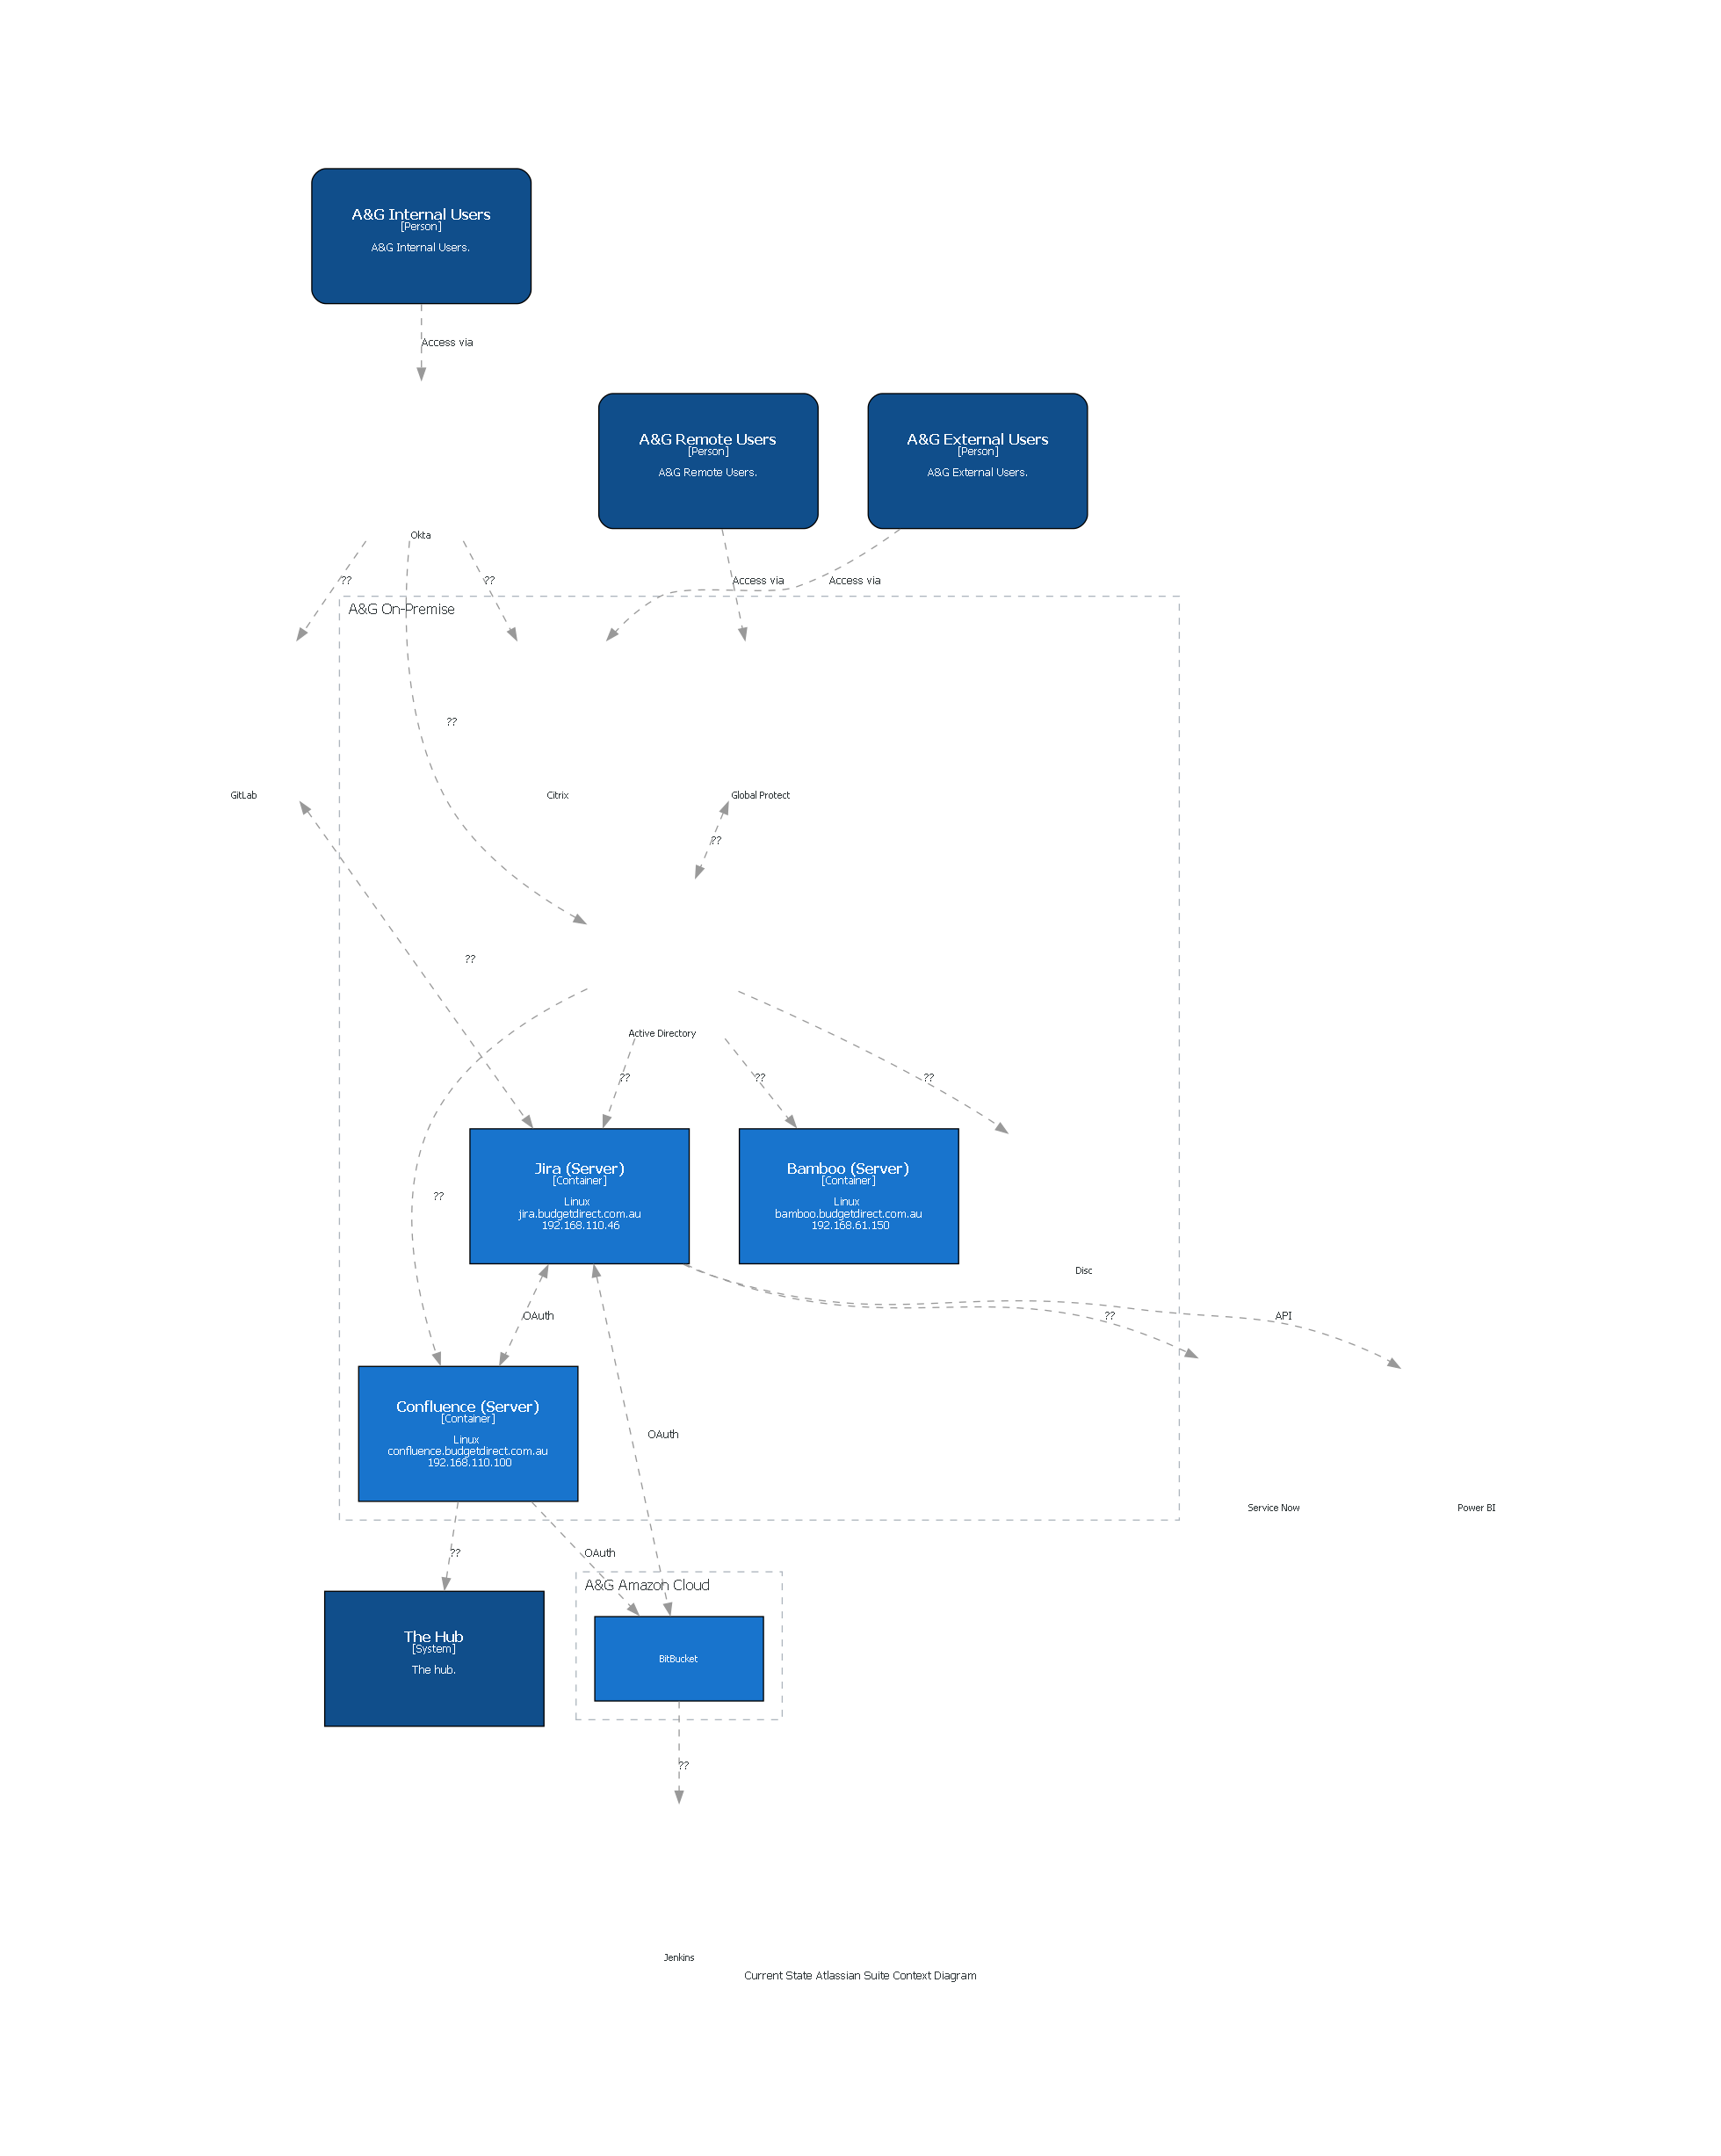

In [37]:
#@title Current Context Diagram
_current_state_atlassian_suite_context_diagram

In [38]:
#@title Transition State Definition
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship 

transition_state_atlassian_suite_settings =  {
  "name": "Transition State Atlassian Suite Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** transition_state_atlassian_suite_settings) as _transition_state_atlassian_suite_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + AGInternalUsers
  internalUsers = AGInternalUsers().Get()

  #@markdown + AGRemoteUsers
  remoteUsers = AGRemoteUsers().Get()

  #@markdown + AGExternalUsers
  externalUsers = AGExternalUsers().Get()

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown On-Premise
  with SystemBoundary("On-Premise"):
    #@markdown + ActiveDirectory
    activeDirectory = ActiveDirectory().Get()

    #@markdown + GlobalProtect
    globalProtect = GlobalProtect().Get()

    #@markdown + Bamboo (Server)
    bamboo = Bamboo().Get()

    #@markdown + DISC
    disc = Disc().Get()

    #@markdown + Citrix
    citrix = Citrix().Get()

  #@markdown Amazon Cloud
  with SystemBoundary("Amazon Cloud"):
    #@markdown + BitBucket
    bitBucket = BitBucket().Get()

  #@markdown Atlassian
  with SystemBoundary("Atlassian"):
    #@markdown + Confluence (Server)
    confluence = Confluence().Get()

    #@markdown + Jira (Server)
    jira = Jira().Get()

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Jenkins  
  jenkins = Jenkins().Get()

  #@markdown + Service Now
  serviceNow = ServiceNow().Get()

  #@markdown + PowerBi
  powerBi = PowerBI().Get()

  #@markdown + The Hub
  theHub = TheHub().Get()

  #@markdown + Okta
  okta = Okta().Get()

  #@markdown + GitLab
  gitLab = GitLab().Get()

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]

  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]

  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << jira
  jira >> Relationship("OAuth") << [bitBucket, confluence]

  globalProtect >> Relationship("??") << [activeDirectory]

  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]

  confluence >> Relationship("??") >> [theHub]
  confluence >> Relationship("OAuth") >> [bitBucket]

  jira >> Relationship("API") >> [powerBi]

  bitBucket >> Relationship("??") >> [jenkins]

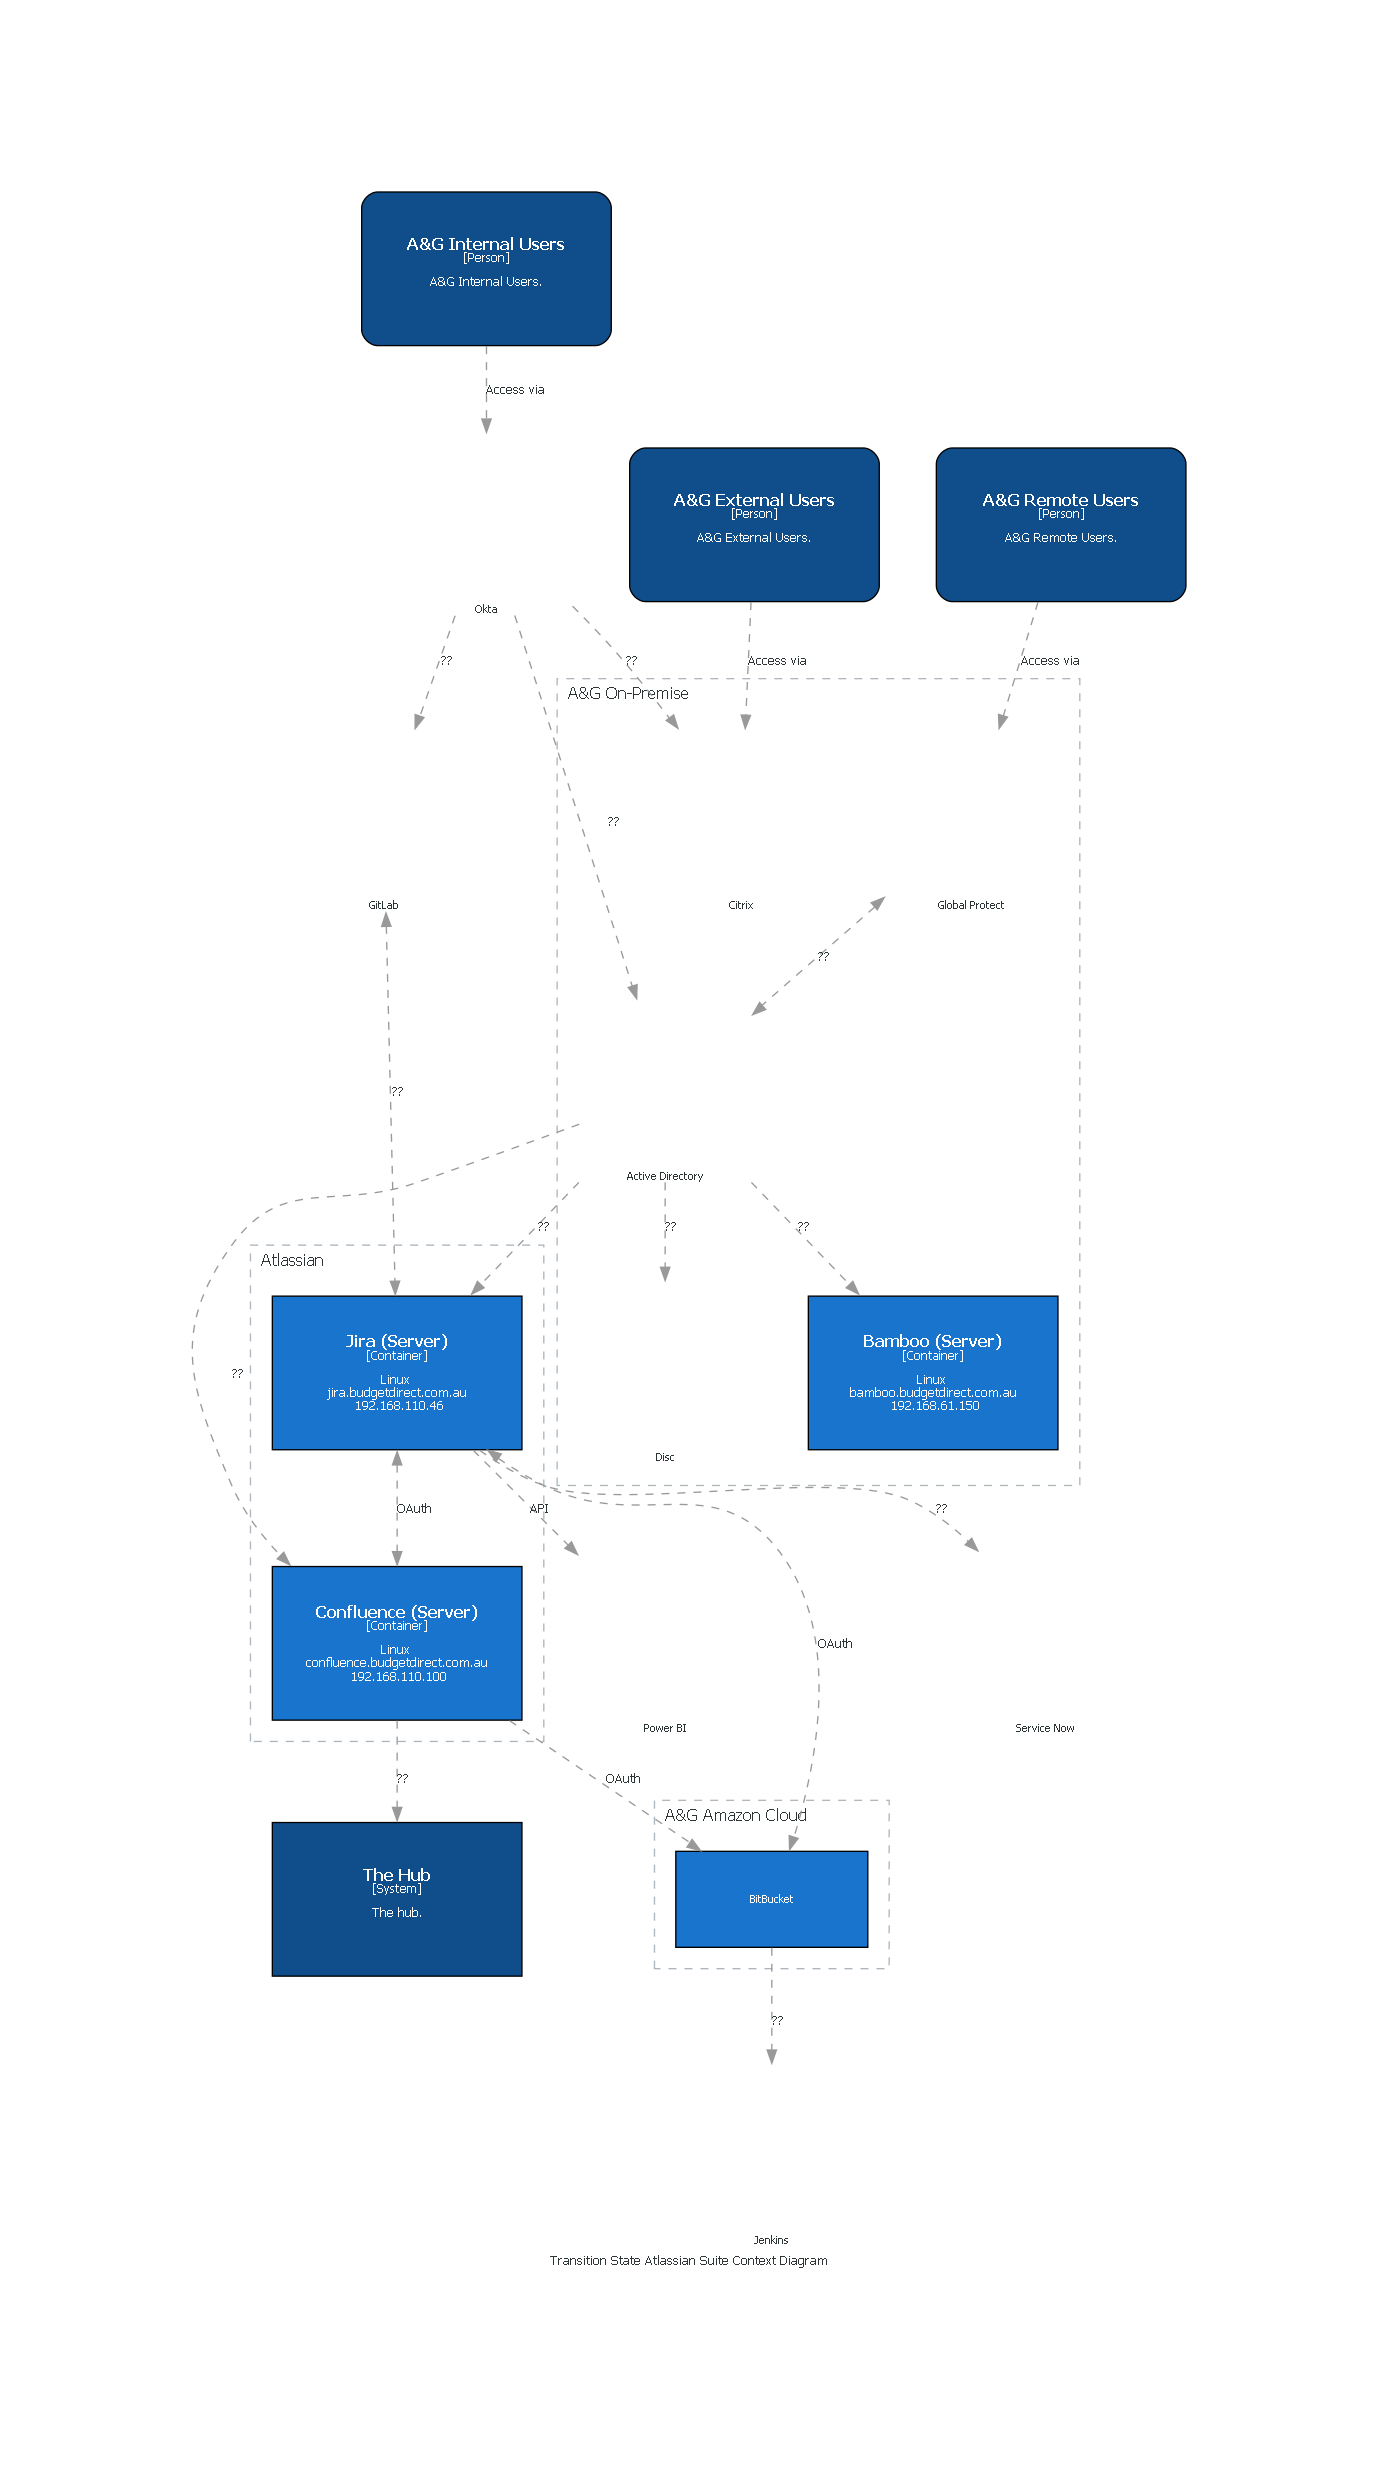

In [39]:
#@title Transition Context Diagram
_transition_state_atlassian_suite_context_diagram

In [40]:
#@title Future State Definition
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship

future_state_atlassian_suite_settings =  {
  "name": "future State Atlassian Suite Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** future_state_atlassian_suite_settings) as _future_state_atlassian_suite_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + AGInternalUsers
  internalUsers = AGInternalUsers().Get()

  #@markdown + AGRemoteUsers
  remoteUsers = AGRemoteUsers().Get()

  #@markdown + AGExternalUsers
  externalUsers = AGExternalUsers().Get()

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown On-Premise
  with SystemBoundary("On-Premise"):
    #@markdown + ActiveDirectory
    activeDirectory = ActiveDirectory().Get()

    #@markdown + GlobalProtect
    globalProtect = GlobalProtect().Get()

    #@markdown + Bamboo (Server)
    bamboo = Bamboo().Get()

    #@markdown + DISC
    disc = Disc().Get()

    #@markdown + Citrix
    citrix = Citrix().Get()

  #@markdown Amazon Cloud
  with SystemBoundary("Amazon Cloud"):
    #@markdown + BitBucket
    bitBucket = BitBucket().Get()

  #@markdown Atlassian
  with SystemBoundary("Atlassian"):
    #@markdown + Confluence (Server)
    confluence = Confluence().Get()

    #@markdown + Jira (Server)
    jira = Jira().Get()

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Jenkins  
  jenkins = Jenkins().Get()

  #@markdown + Service Now
  serviceNow = ServiceNow().Get()

  #@markdown + PowerBi
  powerBi = PowerBI().Get()

  #@markdown + The Hub
  theHub = TheHub().Get()

  #@markdown + Okta
  okta = Okta().Get()

  #@markdown + GitLab
  gitLab = GitLab().Get()

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]

  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]

  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << jira
  jira >> Relationship("OAuth") << [bitBucket, confluence]

  globalProtect >> Relationship("??") << [activeDirectory]

  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]

  confluence >> Relationship("??") >> [theHub]
  confluence >> Relationship("OAuth") >> [bitBucket]

  jira >> Relationship("API") >> [powerBi]

  bitBucket >> Relationship("??") >> [jenkins]

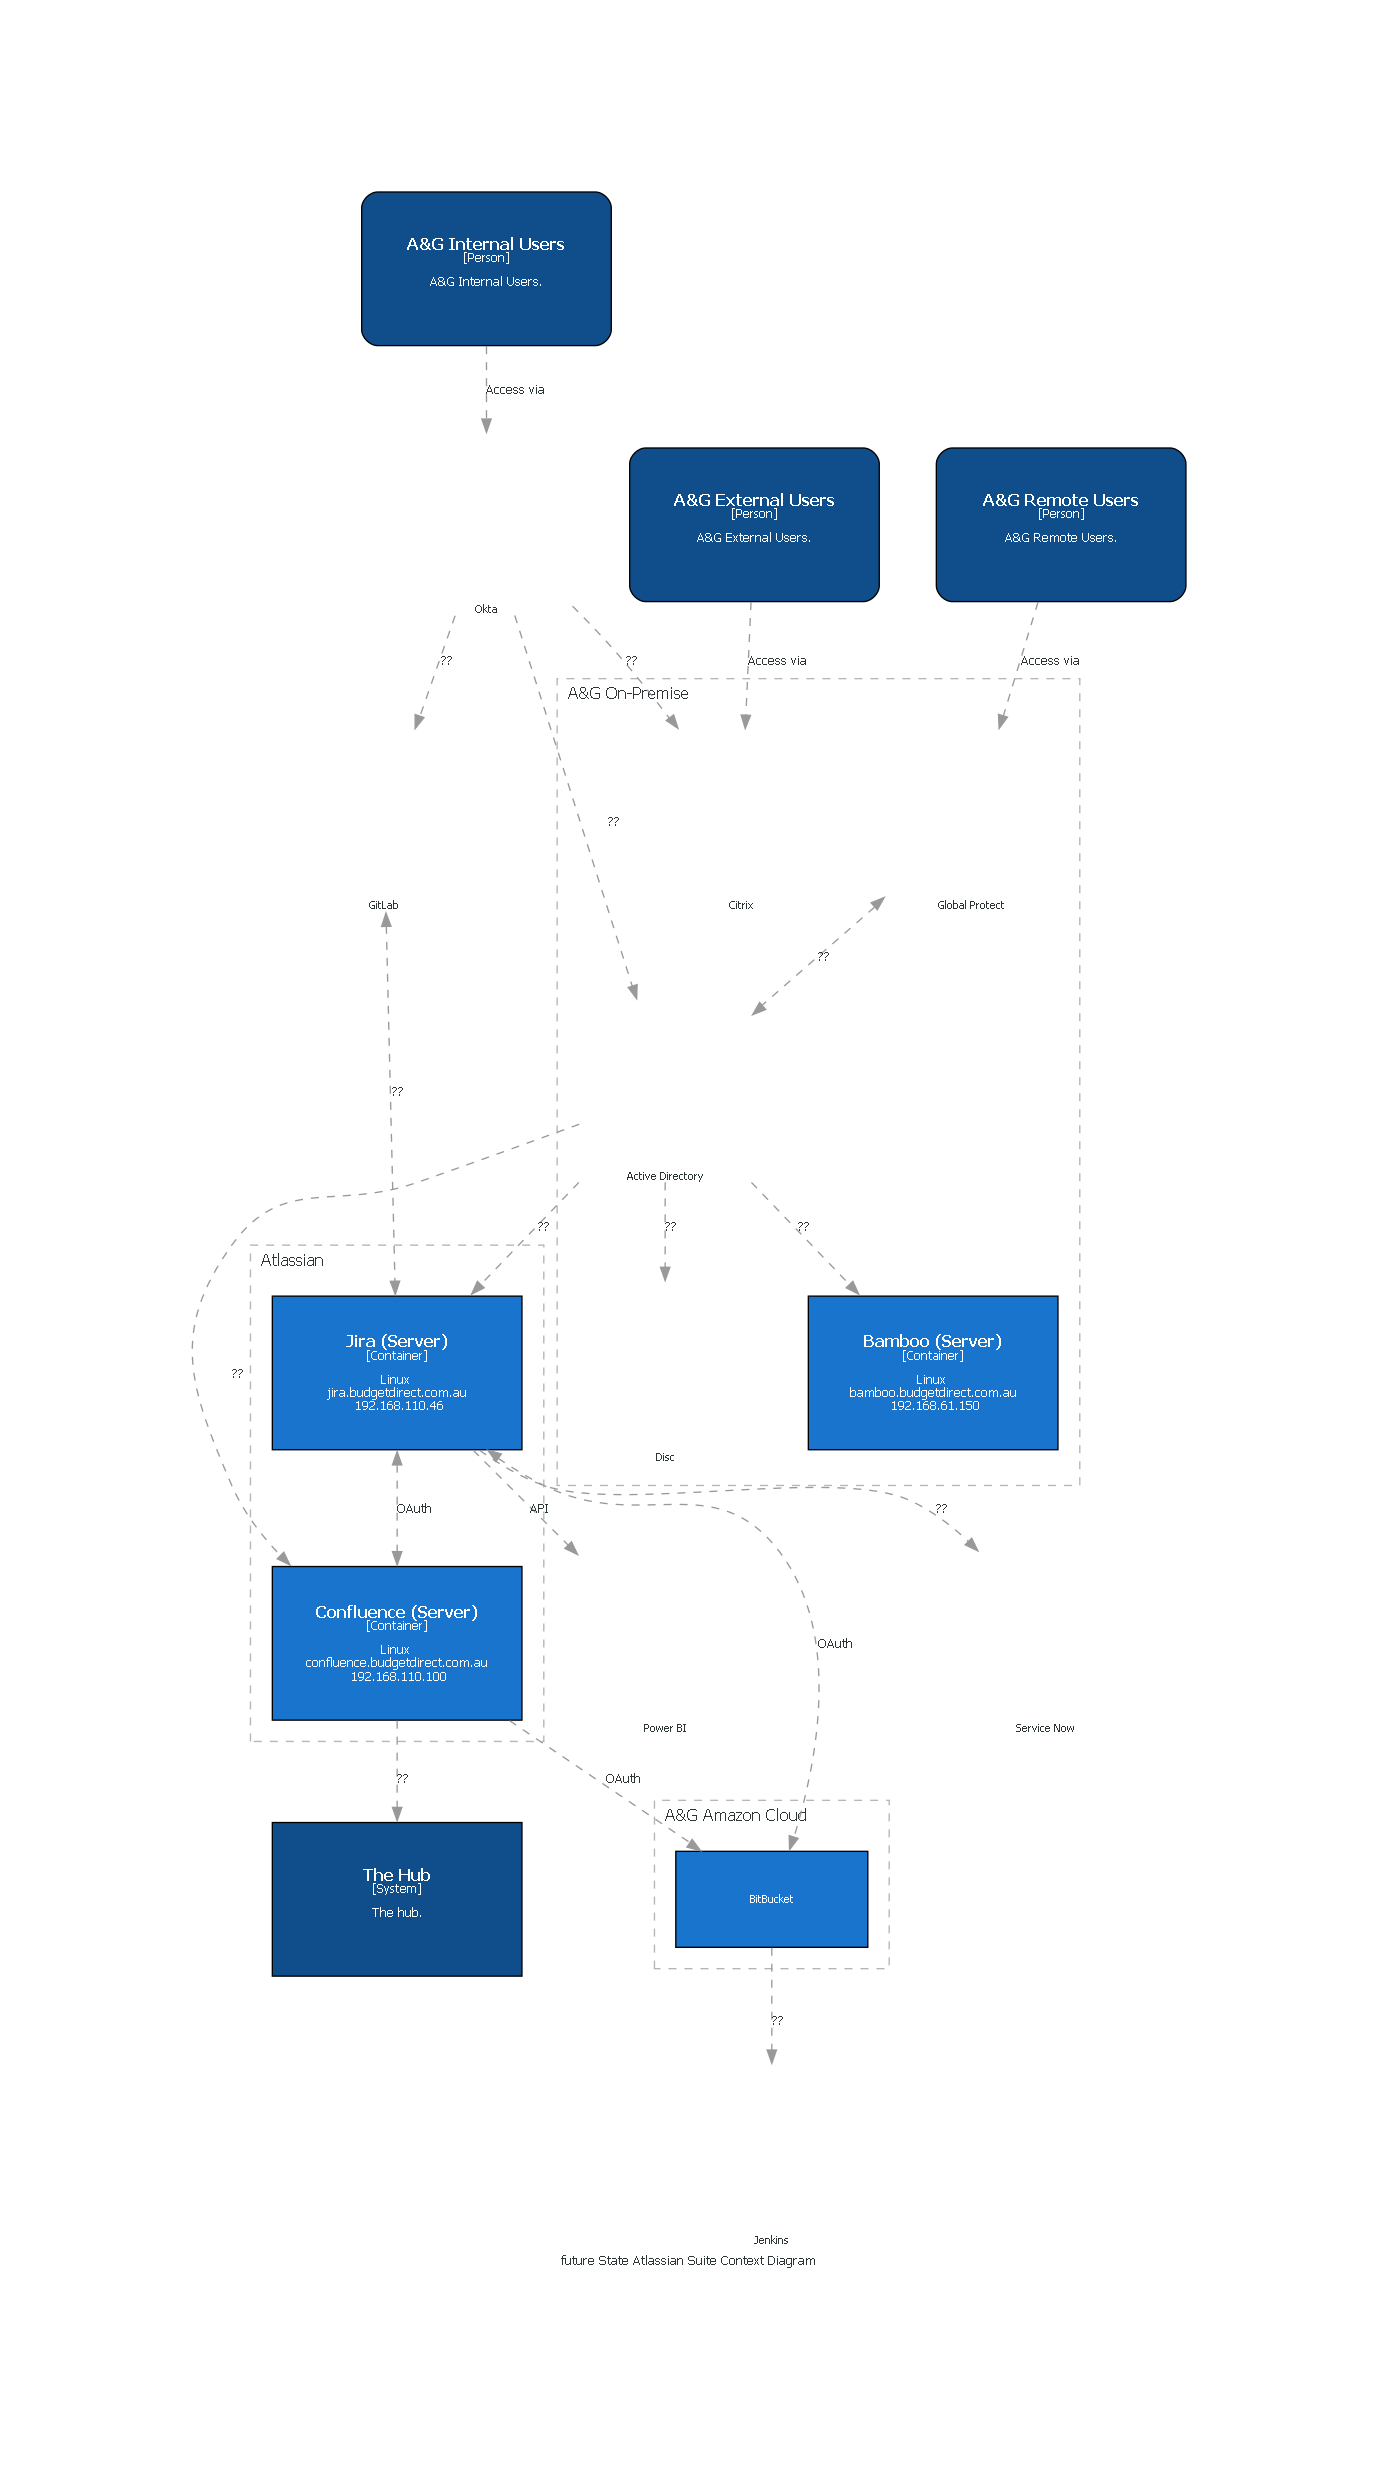

In [41]:
#@title Future Context Diagram
_future_state_atlassian_suite_context_diagram